<a href="https://colab.research.google.com/github/JUNNAY1188/Bratsv3.0/blob/main/bratsv3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import os
from google.colab import drive
import cv2
import matplotlib.pyplot as plt
import os
#Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from PIL import Image
#Import scikit-learn for train-test split and preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
#Import Keras for building the neural network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
#to display plots inline in the notebook
%matplotlib inline

In [35]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [36]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/br35h/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/br35h/no/no1236.jpg
/content/drive/MyDrive/br35h/no/no1245.jpg
/content/drive/MyDrive/br35h/no/no1233.jpg
/content/drive/MyDrive/br35h/no/no1239.jpg
/content/drive/MyDrive/br35h/no/no1231.jpg
/content/drive/MyDrive/br35h/no/no124.jpg
/content/drive/MyDrive/br35h/no/no1237.jpg
/content/drive/MyDrive/br35h/no/no1232.jpg
/content/drive/MyDrive/br35h/no/no1238.jpg
/content/drive/MyDrive/br35h/no/no1234.jpg
/content/drive/MyDrive/br35h/no/no1235.jpg
/content/drive/MyDrive/br35h/no/no1263.jpg
/content/drive/MyDrive/br35h/no/no1259.jpg
/content/drive/MyDrive/br35h/no/no1267.jpg
/content/drive/MyDrive/br35h/no/no1270.jpg
/content/drive/MyDrive/br35h/no/no1265.jpg
/content/drive/MyDrive/br35h/no/no1264.jpg
/content/drive/MyDrive/br35h/no/no1260.jpg
/content/drive/MyDrive/br35h/no/no1266.jpg
/content/drive/MyDrive/br35h/no/no126.jpg
/content/drive/MyDrive/br35h/no/no1261.jpg
/content/drive/MyDrive/br35h/no/no1262.jpg
/content/drive/MyDrive/br35h/no/no1256.jpg
/content/driv

In [37]:
# Get the path of files
image_directory='/content/drive/MyDrive/br35h/'

no_tumor_images=os.listdir(image_directory+'no/')
yes_tumor_images=os.listdir(image_directory+'yes/')
# initialize dataset and label arrays
dataset=[]
label=[]
# set input size
INPUT_SIZE=64

In [38]:
#loop over each image in each category


for i , image_name in enumerate(no_tumor_images):
    #read the image if its extension is .jpg
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        #resize the image
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        #append image array in dataset list and its label in label list
        dataset.append(np.array(image))
        # we Store images that are not infected by brain tumor in 0 as label in label array
        label.append(0)

        # same for yes images
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
          # we Store images that are infected by brain tumor in 1 as label in label array
        label.append(1)

dataset=np.array(dataset)
label=np.array(label)

/tmp/ipython-input-38-3416939297.py:8: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image=Image.fromarray(image,'RGB')
/tmp/ipython-input-38-3416939297.py:20: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image=Image.fromarray(image, 'RGB')


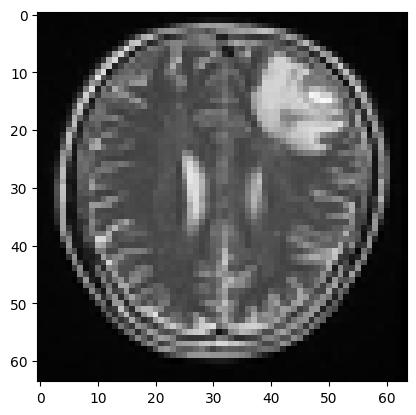

In [39]:
#to show image in dataset
plt.imshow(image)

In [40]:
#print(dataset)
print(label)
print(len(label))

[0 0 0 ... 1 1 1]
3000


In [41]:
# Convert the dataset & label to numpy array
dataset = np.array(dataset)
label = np.array(label)

In [42]:
#Split the dataset and labels into training and testing sets
#80% of the data is used for training and 20% is used for testing
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(y_train.shape)

(2400, 64, 64, 3)
(2400,)


In [43]:
print(x_test.shape)
print(y_test.shape)

(600, 64, 64, 3)
(600,)


In [44]:
# Normalise the data for training purpose
x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

In [45]:
#y_train = to_categorical(y_train, num_classes=2)
#y_test = to_categorical(y_test, num_classes=2)
#print(y_train.shape)

In [46]:
# Building a CNN model
model = Sequential()
#layer 1 :
#32=number of filters. each filter has 3 width and 3 height
model.add(Conv2D(32, (3,3), input_shape = (INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#layer 2 :
model.add(Conv2D(32, (3,3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#layer 3 :
model.add(Conv2D(64, (3,3),  kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
#model.add(Dense(2))
# 'sigmoid' to binary classification 'softmax' to multi classification
model.add(Activation('sigmoid')) #to full connection for layer in CNN
# model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,225 (688.38 KB)

 Trainable params: 176,225 (688.38 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size = 16, verbose = 1, epochs = 10, validation_data = (x_test, y_test),shuffle = 'False')

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 89ms/step - accuracy: 0.6617 - loss: 0.6169 - val_accuracy: 0.8033 - val_loss: 0.4503
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.8145 - loss: 0.4127 - val_accuracy: 0.8200 - val_loss: 0.3784
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.8653 - loss: 0.3297 - val_accuracy: 0.8817 - val_loss: 0.2600
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.8999 - loss: 0.2396 - val_accuracy: 0.9183 - val_loss: 0.2036
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9299 - loss: 0.1611 - val_accuracy: 0.9350 - val_loss: 0.1593
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9601 - loss: 0.1069 - val_accuracy: 0.9717 - val_loss: 0.0967
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.9848 - loss: 0.0584 - val_accuracy: 0.9733 - val_loss: 0.1078
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - accuracy: 0.9921 - loss: 0.0379 - 

In [ ]:
# Evaluate the model on the test data and print the accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy on test data:', accuracy)

In [ ]:
model.save('Brain Tumor detection.h5')

In [ ]:
# Testing the model
import cv2
from keras.models import load_model
from PIL import Image
import numpy as np

model = load_model('Brain Tumor detection.h5')

In [ ]:
# Testing on one image
image = cv2.imread('/content/drive/MyDrive/br35h/pred/pred4.jpg') # no tumor detected
img = Image.fromarray(image)
img = img.resize((64,64))
img = np.array(img)
print(img)

In [ ]:
input_img = np.expand_dims(img, axis=0)

result = model.predict(input_img)
print(result)
# the result is 0 that means the image not infected by brain tumor

In [ ]:
# Testing on one image
image = cv2.imread('/content/drive/MyDrive/br35h/pred/pred7.jpg') # tumor detected
img = Image.fromarray(image)
img = img.resize((64,64))
img = np.array(img)
print(img)

In [ ]:
input_img = np.expand_dims(img, axis=0)

result = model.predict(input_img)
print(result)
# the result is 1 that means the image infected by brain tumor

In [ ]:
#this part of code to convert the trained model to tflite  to use it into (android studio )
from keras.models import load_model

model = load_model('Brain Tumor detection.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tf_lite_model = converter.convert()

with open('model.tflite', 'wb') as f:
      f.write(tf_lite_model)